# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [1]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
import scipy as sp
from skimage import io

from skimage import img_as_float
from matplotlib import cm
from skimage import img_as_ubyte
from scipy import signal



Pretty printing has been turned OFF


## Filtering 
**1.1**

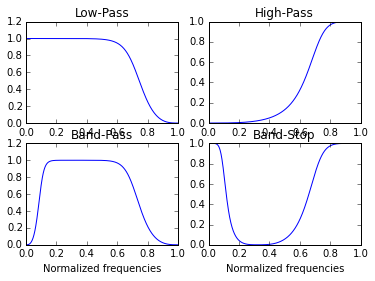

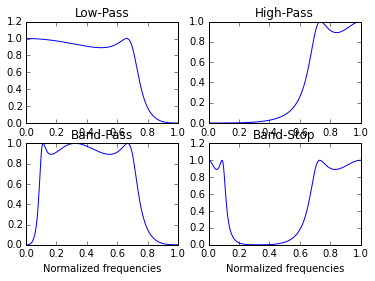

In [11]:
# Butterworth
plt.figure(1)

[b_low, a_low] = signal.butter(3, 0.7, btype='low')
[w_low, h_low] = signal.freqz(b_low, a_low)
plt.subplot(221)
plt.title('Low-Pass')
plt.plot(w_low/np.pi, np.abs(h_low))
plt.xlabel('Normalized frequencies')


[b_high, a_high] = signal.butter(3, 0.7, btype='high')
[w_high, h_high] = signal.freqz(b_high, a_high)
plt.subplot(222)
plt.title('High-Pass')
plt.plot(w_high/np.pi, np.abs(h_high))
plt.xlabel('Normalized frequencies')


[b_pass, a_pass] = signal.butter(3, [0.1, 0.7], btype='bandpass')
[w_pass, h_pass] = signal.freqz(b_pass, a_pass)
plt.subplot(223)
plt.title('Band-Pass')
plt.plot(w_pass/np.pi, np.abs(h_pass))
plt.xlabel('Normalized frequencies')

[b_stop, a_stop] = signal.butter(3, [0.1, 0.7], btype='bandstop')
[w_stop, h_stop] = signal.freqz(b_stop, a_stop)
plt.subplot(224)
plt.title('Band-Stop')
plt.plot(w_stop/np.pi, np.abs(h_stop))
plt.xlabel('Normalized frequencies')


# Chebychev-I
plt.figure(2)

[b_clow, a_clow] = signal.cheby1(3, 1, 0.7, btype='low')
[w_clow, h_clow] = signal.freqz(b_clow, a_clow)
plt.subplot(221)
plt.title('Low-Pass')
plt.plot(w_clow/np.pi, np.abs(h_clow))
plt.xlabel('Normalized frequencies')


[b_chigh, a_chigh] = signal.cheby1(3, 1, 0.7, btype='high')
[w_chigh, h_chigh] = signal.freqz(b_chigh, a_chigh)
plt.subplot(222)
plt.title('High-Pass')
plt.plot(w_chigh/np.pi, np.abs(h_chigh))
plt.xlabel('Normalized frequencies')


[b_cpass, a_cpass] = signal.cheby1(3, 1, [0.1, 0.7], btype='bandpass')
[w_cpass, h_cpass] = signal.freqz(b_cpass, a_cpass)
plt.subplot(223)
plt.title('Band-Pass')
plt.plot(w_cpass/np.pi, np.abs(h_cpass))
plt.xlabel('Normalized frequencies')

[b_cstop, a_cstop] = signal.cheby1(3, 1, [0.1, 0.7], btype='bandstop')
[w_cstop, h_cstop] = signal.freqz(b_cstop, a_cstop)
plt.subplot(224)
plt.title('Band-Stop')
plt.plot(w_cstop/np.pi, np.abs(h_cstop))
plt.xlabel('Normalized frequencies')





**1.2**

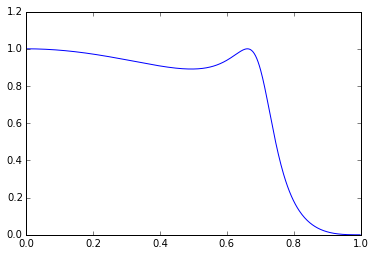

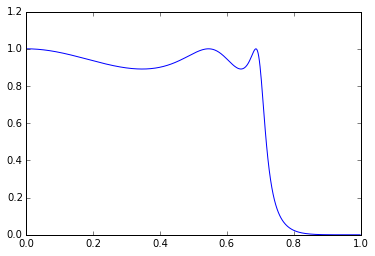

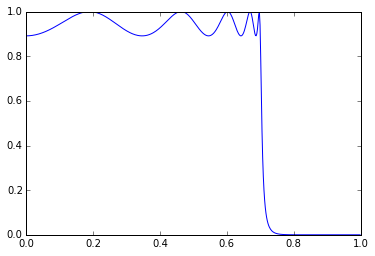

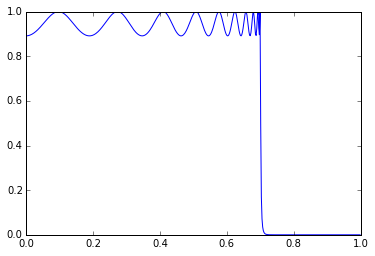

In [14]:
for f in [3,5,10,20]:
    plt.figure()
    [b, a] = signal.cheby1(f, 1, 0.7)
    [w, h] = signal.freqz(b, a)
    plt.plot(w/np.pi, np.abs(h))
    plt.show()

## Recursive filter 

**2.1**

In [16]:
def dirac(n=0, N=20):
    if n > N - 1:
        raise ValueError('n should be in the range from 0 to N-1')
            
    s = np.zeros((N, ))
    s[n] = 1
    
    return s

signal = dirac(20, 40)



[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.]


**2.2**

**2.3**

**2.4**

**3.1**

**3.2** , **3.3**

**3.4**